# Albumentation과 Augraphy 모두 적용해보기
1. HorizontalFlip
2. Blur
3. GaussNoise
4. ISONoise
5. Rotation (45, 90, 135, 180, 225, 270, 315)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from augraphy import *
import albumentations as A
import cv2
import warnings
warnings.filterwarnings('ignore')

## 모든 훈련데이터에 대해서 좌우반전된 사진 생성
- train 폴더 복제 (train_new)

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
train.head()

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16


In [4]:
train.shape

(1570, 2)

In [5]:
train_img_list = train['ID'].to_list()

In [6]:
transform = A.Compose([
    A.HorizontalFlip(p=1)
])

for img in train_img_list:
    image = cv2.imread(f"./data/train_new/{img}") #/data/ephemeral/home/document_type_classification/data/train new
    transformed_1 = transform(image=image)
    transformed_image_1 = transformed_1["image"]
    cv2.imwrite(f"./data/train_new/flipped_{img}", transformed_image_1)
    target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
    new_row = {'ID': f'flipped_{img}', 'target': target_value}
    train = train.append(new_row, ignore_index=True)


In [7]:
train.shape

(3140, 2)

## 모든 훈련데이터에 Blur, GaussNoise 처리한 데이터 만들기 (Albumentation)

In [8]:
train_img_list = train['ID'].to_list()

In [9]:
transform_1 = A.Compose([
    A.Blur(blur_limit=(4,4), always_apply=True)
])
transform_2 = A.Compose([
    A.Blur(blur_limit=(3,3), always_apply=True)
])
transform_3 = A.Compose([
    A.GaussNoise(var_limit=(300, 300), p=1.0)
])
transform_4 = A.Compose([
    A.GaussNoise(var_limit=(600, 600), p=1.0)
])


In [10]:
for img in train_img_list:
    image = cv2.imread(f"./data/train_new/{img}")
    transformed_1 = transform_1(image=image)
    transformed_2 = transform_2(image=image)
    transformed_3 = transform_3(image=image)
    transformed_4 = transform_4(image=image)

    transformed_image_1 = transformed_1["image"]
    transformed_image_2 = transformed_2["image"]
    transformed_image_3 = transformed_3["image"]
    transformed_image_4 = transformed_4["image"]
    
    cv2.imwrite(f"./data/train_new/Blur1_{img}", transformed_image_1)
    cv2.imwrite(f"./data/train_new/Blur2_{img}", transformed_image_2)
    cv2.imwrite(f"./data/train_new/GaussNoise1_{img}", transformed_image_3)
    cv2.imwrite(f"./data/train_new/GaussNoise2_{img}", transformed_image_4)

    target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
    new_row1 = {'ID': f'Blur1_{img}', 'target': target_value}
    new_row2 = {'ID': f'Blur2_{img}', 'target': target_value}
    new_row3 = {'ID': f'GaussNoise1_{img}', 'target': target_value}
    new_row4 = {'ID': f'GaussNoise2_{img}', 'target': target_value}

    train = train.append(new_row1, ignore_index=True)
    train = train.append(new_row2, ignore_index=True)
    train = train.append(new_row3, ignore_index=True)
    train = train.append(new_row4, ignore_index=True)

In [11]:
len(train['ID'].unique())

15700

## 모든 훈련데이터에 BrightnessTexturize, InkBleed 처리하기 (Augraphy)

In [12]:
transform_5 = BrightnessTexturize(texturize_range=(0.99, 0.99),
                                           deviation=0.1 )
transform_6 = InkBleed(intensity_range=(0.4, 0.4),
                    kernel_size=(5, 5),
                    severity=(0.4, 0.4)
                    )

In [13]:
for img in train_img_list:
    image = cv2.imread(f"./data/train_new/{img}")
    transformed_image_5 = transform_5(image)
    transformed_image_6 = transform_6(image)
    
    cv2.imwrite(f"./data/train_new/BrightnessTexturize_{img}", transformed_image_5)
    cv2.imwrite(f"./data/train_new/InkBleed_{img}", transformed_image_6)

    target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
    new_row5 = {'ID': f'BrightnessTexturize_{img}', 'target': target_value}
    new_row6 = {'ID': f'InkBleed_{img}', 'target': target_value}

    train = train.append(new_row5, ignore_index=True)
    train = train.append(new_row6, ignore_index=True)

In [14]:
len(train['ID'].unique())

21980

## 모든 훈련데이터 45, 90, 135, 180, 225, 270, 315도 돌리기 (ShiftScaleRotate)

In [15]:
train_img_list = train['ID'].to_list()

In [16]:
len(train_img_list)

21980

In [17]:
angles = [45, 90, 135, 180, 225, 270, 315]


for img in train_img_list:
    for angle in angles:
        transform = A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=(-angle,-angle), 
                                       border_mode=cv2.BORDER_CONSTANT, value=[255, 255, 255], always_apply=True)
        image = cv2.imread(f"./data/train_new/{img}")
        transformed = transform(image=image)
        transformed_image = transformed["image"]
        cv2.imwrite(f"./data/train_new/{angle}rotated_{img}", transformed_image)
        target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
        new_row = {'ID': f'{angle}rotated_{img}', 'target': target_value}
        train = train.append(new_row, ignore_index=True)
            

In [18]:
train.shape

(175840, 2)

In [19]:
train

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16
...,...,...
175835,135rotated_InkBleed_flipped_ffc22136f958deb1.jpg,9
175836,180rotated_InkBleed_flipped_ffc22136f958deb1.jpg,9
175837,225rotated_InkBleed_flipped_ffc22136f958deb1.jpg,9
175838,270rotated_InkBleed_flipped_ffc22136f958deb1.jpg,9


In [20]:
train.to_csv('train_new.csv', index=False)

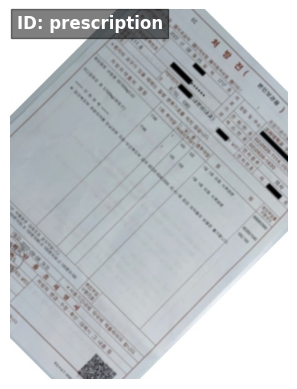

In [23]:
# 변환된 학습 이미지 확인
import random
df_1 = pd.read_csv('./data/train_new.csv')
df_2 = pd.read_csv('./data/meta.csv')

random_id = random.choice(df_1['ID'])
label = df_1[df_1['ID']==random_id]['target'].values[0]
label = df_2[df_2['target']==label]['class_name'].values[0]

image = cv2.imread(f"./data/train_new/{random_id}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image), plt.axis("off")
plt.text(10, 30, f'ID: {label}', color='white', fontsize=12, fontweight='bold', bbox=dict(facecolor='black', alpha=0.5))

plt.show()